In [1]:
import tflearn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score,log_loss

%matplotlib inline

hdf5 not supported (please install/reinstall h5py)


In [2]:
dataframe = pd.read_csv('ign.csv',index_col='Unnamed: 0')

In [25]:
dataframe.head()

,score_phrase,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day
0,Amazing,LittleBigPlanet PS Vita,/games/littlebigplanet-vita/vita-98907,PlayStation Vita,9.0,Platformer,Y,2012,9,12
1,Amazing,LittleBigPlanet PS Vita -- Marvel Super Hero E...,/games/littlebigplanet-ps-vita-marvel-super-he...,PlayStation Vita,9.0,Platformer,Y,2012,9,12
2,Great,Splice: Tree of Life,/games/splice/ipad-141070,iPad,8.5,Puzzle,N,2012,9,12
3,Great,NHL 13,/games/nhl-13/xbox-360-128182,Xbox 360,8.5,Sports,N,2012,9,11
4,Great,NHL 13,/games/nhl-13/ps3-128181,PlayStation 3,8.5,Sports,N,2012,9,11


In [4]:
dataframe['score_phrase'].unique()

array(['Amazing', 'Great', 'Good', 'Awful', 'Okay', 'Mediocre', 'Bad',
       'Painful', 'Unbearable', 'Disaster', 'Masterpiece'], dtype=object)

In [5]:
games = dataframe[['score_phrase','platform','score','genre','editors_choice']]

In [6]:
score_phrase_dict = {'Masterpiece':0,'Amazing':1, 'Great':2, 'Good':3, 'Okay':4, 'Mediocre':5, 'Bad':6,'Awful':7,
       'Painful':8, 'Unbearable':9, 'Disaster':10}
reverse_score_dict = {0:'Masterpiece',1:'Amazing', 2:'Great', 3:'Good', 4:'Okay', 5:'Mediocre', 6:'Bad',7:'Awful',
       8:'Painful', 9:'Unbearable', 10:'Disaster'}

In [7]:

platform_dict = {key:value for (key,value) in zip(games['platform'].unique(),range(games['platform'].unique().size))}
genre_dict = {key:value for (key,value) in zip(games['genre'].unique(),range(games['genre'].unique().size))}
editors_choice_dict = {key:value for (key,value) in zip(games['editors_choice'].unique(),range(games['editors_choice'].unique().size))}

In [8]:
games = games.replace({'score_phrase':score_phrase_dict,'platform':platform_dict,'genre':genre_dict,'editors_choice':editors_choice_dict})

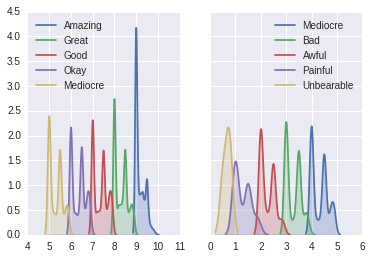

In [24]:
dat = [games[games['score_phrase'] == i]['score'] for i in range(1,11)]
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
for i in range(len(dat)/2):
    sns.kdeplot(dat[i],shade=True,label=reverse_score_dict[i+1],ax=ax1)
for i in range(len(dat)/2):
    sns.kdeplot(dat[i+5],shade=True,label=reverse_score_dict[i+5],ax=ax2)

In [22]:
train_X,test_X,train_y,test_y = train_test_split(games[['platform','score','genre','editors_choice']].values,
                                                 games['score_phrase'].values,test_size=0.33)
kf = KFold(n =train_X.shape[0], n_folds=5)

In [11]:
def score(val_predict,test_y):
    count = 0
    for a,b in zip(val_predict,test_y):
        if a!=b:
            print a,b
        if a == b:
            count += 1
    return (1.0 * count)/test_y.shape[0]
        

In [12]:
rfc = RandomForestClassifier(n_estimators=100)
fold = 0
for train_index,test_index in kf:
    rfc.fit(train_X[train_index],train_y[train_index])
    val_predict = rfc.predict(train_X[test_index])
    print 'Fold {0}, Score = {1}'.format(fold,score(val_predict,train_y[test_index]))
    fold += 1

8 9
8 9
6 8
9 10
Fold 0, Score = 0.998397435897
8 9
7 8
8 9
8 9
9 10
Fold 1, Score = 0.997996794872
8 9
5 6
8 9
Fold 2, Score = 0.998798076923
7 9
8 10
7 8
Fold 3, Score = 0.99879759519
Fold 4, Score = 1.0


In [13]:
val_predict = rfc.predict(test_X)
print 'Fold {0}, Score = {1}'.format(fold,score(val_predict,test_y))

7 8
8 9
8 9
8 9
8 9
8 9
Fold 5, Score = 0.999023914104
